In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [29]:
# Load the dataset
df= pd.read_csv('cars_data.csv')

In [30]:
numerical_columns = ['Mileage', 'Engine', 'Power', 'Seats']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [31]:
# Create a new feature: Age of the car
df['Car_Age'] = 2024 - df['Year']

In [32]:
# Drop irrelevant columns
df = df.drop(['Name', 'Year'], axis=1)

In [33]:
df= pd.get_dummies(df, columns=['Location', 'Fuel_Type', 'Transmission'], drop_first=True)

In [34]:
# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [50]:
# Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=10, random_state=45)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=45)

In [51]:
# Define features (X) and target (y)
X = df.drop(['Price'], axis=1)
y = df['Price']


In [52]:
# Evaluate the model
y_pred = dt_regressor.predict(X_test) # Predict target variable using the trained model
# Evaluate the model
y_pred = dt_regressor.predict(X_test) # Predict target variable using the trained model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [53]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2.1361515262209525
Mean Squared Error (MSE): 29.708370150367365
Root Mean Squared Error (RMSE): 5.45053851929948


In [54]:
# Optional: Hyperparameter tuning (example)
from sklearn.model_selection import GridSearchCV


In [55]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [56]:
# Eva
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=45), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=45),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [57]:
# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [58]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))


In [59]:
print(f"Tuned MAE: {mae_tuned}")
print(f"Tuned RMSE: {rmse_tuned}")

Tuned MAE: 2.050052353620526
Tuned RMSE: 4.809740673983752


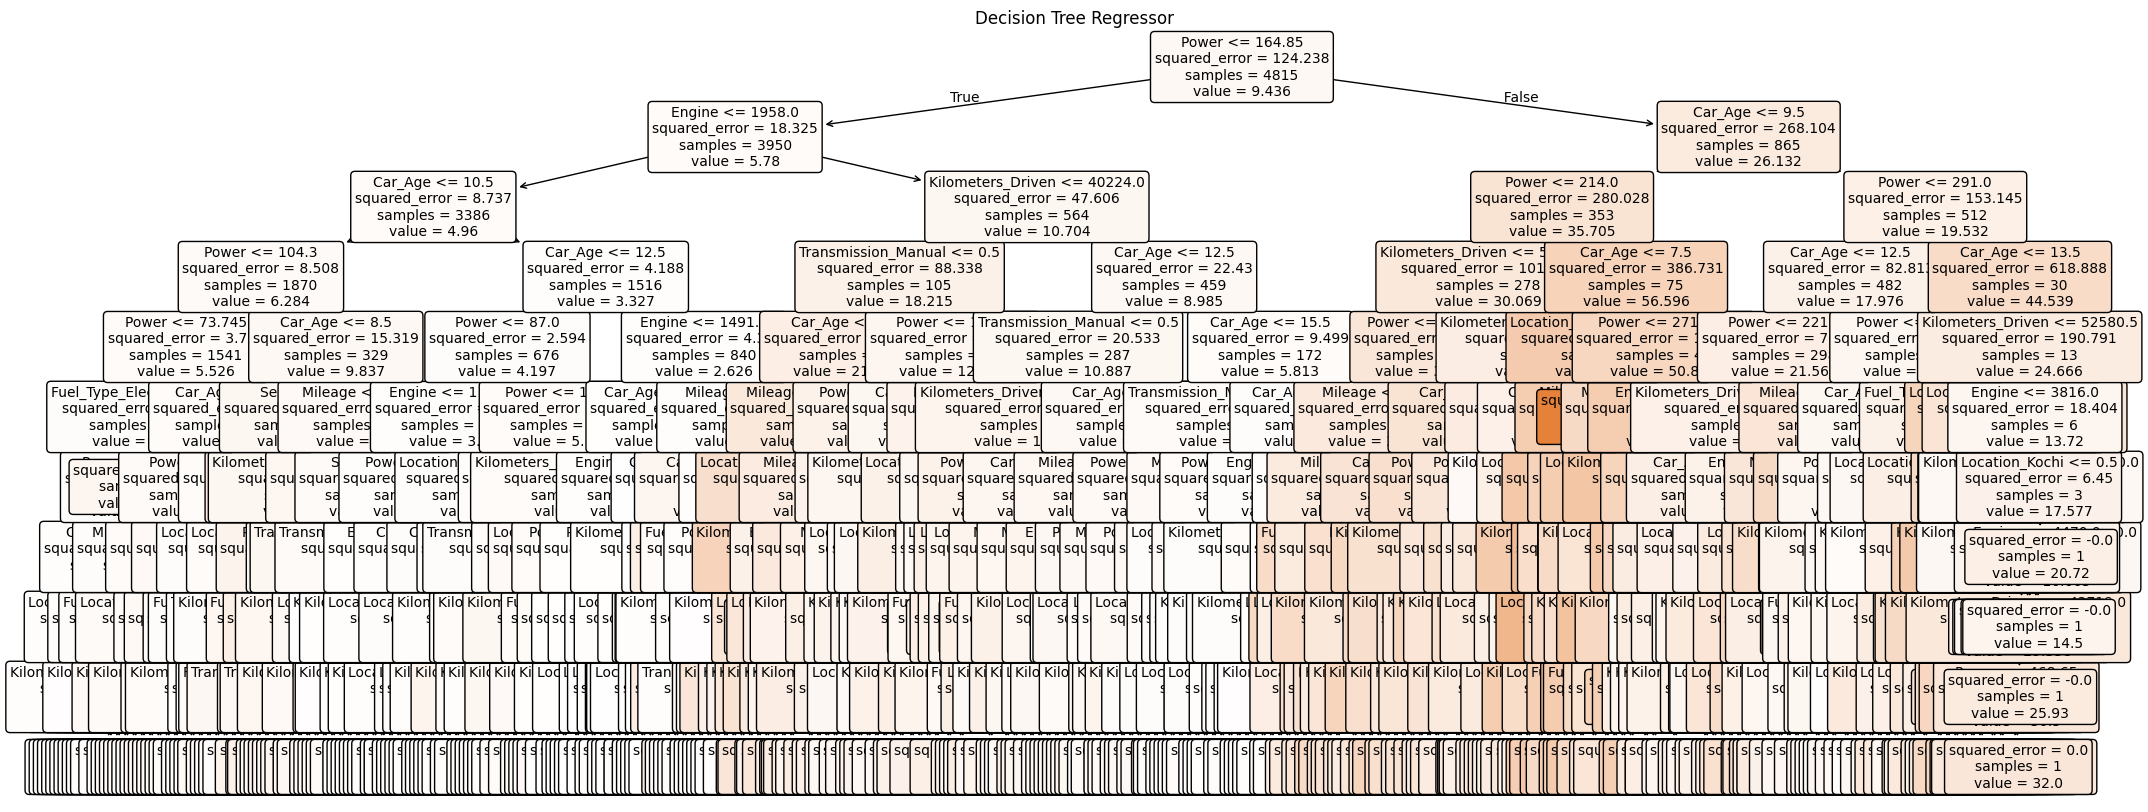

In [60]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(25, 10))
tree.plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor")
plt.show()


In [61]:
# Export the tree to a .dot file for visualization with external tools
tree.export_graphviz(
    dt_regressor,
    out_file="decision_tree.dot",
    feature_names=X.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

print("Decision tree exported as 'decision_tree.dot'.")


Decision tree exported as 'decision_tree.dot'.


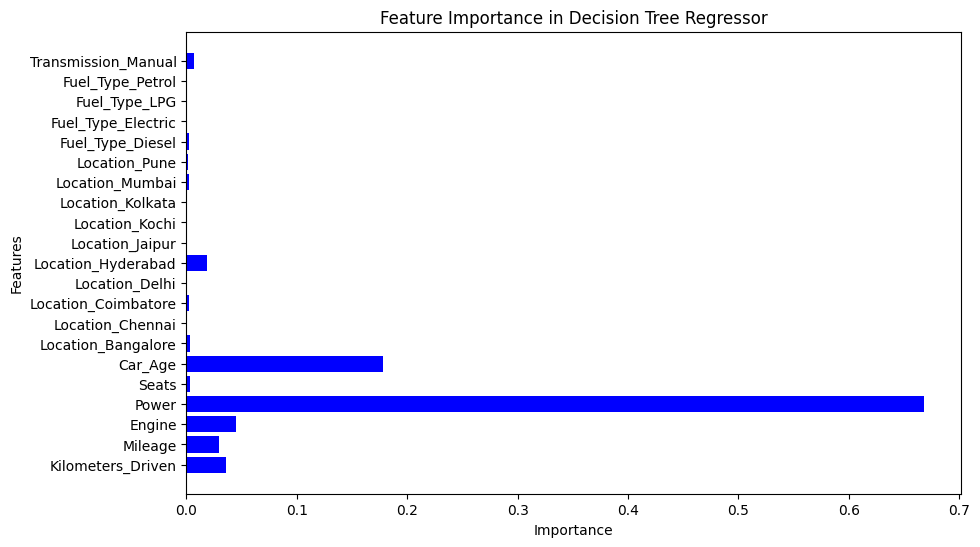

In [63]:
# Feature importance plot
feature_importances = dt_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Regressor')
plt.show()


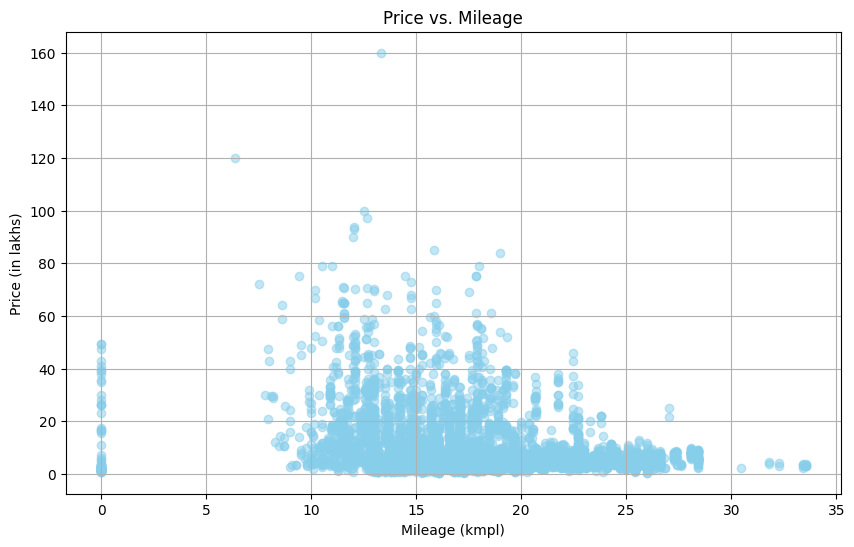

In [65]:
import matplotlib.pyplot as plt

# Scatter Plot: Price vs. Mileage
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, color='skyblue')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (in lakhs)')
plt.grid(True)
plt.show()
